In [597]:
import torch
import torchvision
import torch.nn as nn

## Autograd

In [598]:
x = torch.randn(3, requires_grad = True)
x

tensor([-0.4280,  1.1223, -1.1890], requires_grad=True)

In [599]:
y = x + 2
y

tensor([1.5720, 3.1223, 0.8110], grad_fn=<AddBackward0>)

pytorch cria um grafo computacional quando uma operação é realizada em um tensor que requer gradiente.

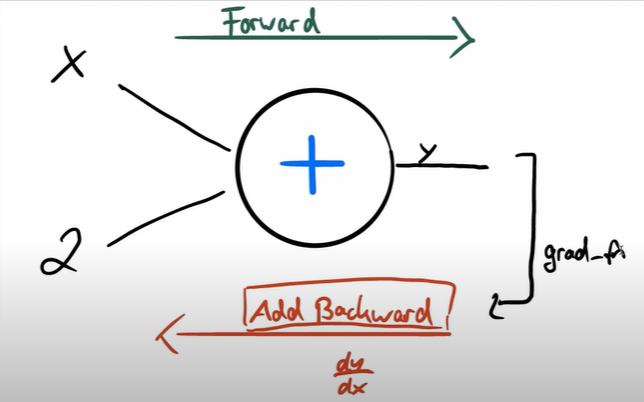

In [600]:
z = y * y * 2
z

tensor([ 4.9425, 19.4979,  1.3156], grad_fn=<MulBackward0>)

In [601]:
z = z.mean()
z

tensor(8.5853, grad_fn=<MeanBackward0>)

In [602]:
z.backward() # dz/dx
print(x.grad)

tensor([2.0960, 4.1631, 1.0814])


In [603]:
v = torch.tensor([1,1,1])
y.backward(v)
print(x.grad)

tensor([3.0960, 5.1631, 2.0814])


Removendo dependência do gradiente

In [604]:
x.requires_grad_(False)
print(x)

tensor([-0.4280,  1.1223, -1.1890])


In [605]:
y = x.detach()
print(y)

tensor([-0.4280,  1.1223, -1.1890])


In [606]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([1.5720, 3.1223, 0.8110])


Exemplo dummy com pesos fixos

In [607]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(1):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])


In [608]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(2):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [609]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(2): 
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Também devemos zerar os gradientes após cada iteração do processo de otimização

## Backpropagation

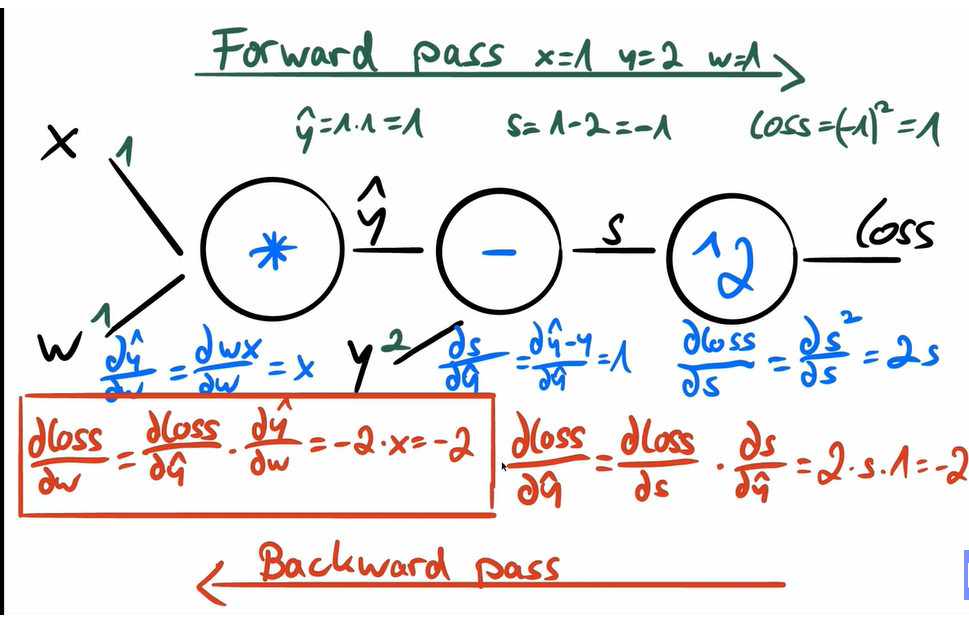

In [610]:
x = torch.tensor(1.0)
y = torch.tensor(2)
w = torch.tensor(1.0, requires_grad= True)

In [611]:
# forward pass, calcular perda

y_hat = w*x
loss = (y_hat - y) ** 2
loss

tensor(1., grad_fn=<PowBackward0>)

In [612]:
#backward pass

loss.backward()
w.grad

tensor(-2.)

em seguida atualizar pesos e recalcular
weights.grad.zero_()...

Gradiente descendente

In [613]:
import numpy as np

# f = w * x
#f = 2*x
x = np.array([1,2,3,4], dtype = np.float32)
y= np.array([2,4,6,8], dtype = np.float32)

w = 0.0

Model prediction

In [614]:
def forward(x):
    return w * x

Loss

In [615]:
def loss(y, y_predicted):
    return ((y-y_predicted)**2).mean()

Gradiente

In [616]:
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y)/len(x)

In [617]:
print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000


Treinamento

In [618]:
learning_rate = 1e-2
n_iters = 10

for epoch in range(n_iters):
    # predição = forward pass
    y_predicted = forward(x)
    
    # loss
    l = loss(y,y_predicted)
    dw = gradient(x,y,y_predicted)

    # gradiente
    dw = gradient(x,y,y_predicted)

    # atualizar pesos
    w -= learning_rate * dw

    print(f"epoch {epoch +1}: w = {w:.3f}, loss = {l:.3f}")
print(f"Prediction after training: f(5) = {forward(5):.3f}")

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
Prediction after training: f(5) = 8.031


Agora de forma automática com pytorch

In [619]:
x = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

Treinamento

In [620]:
learning_rate = 1e-2
n_iters = 10

for epoch in range(n_iters):
    # predição = forward pass
    y_predicted = forward(x)
    
    # loss
    l = loss(y,y_predicted)

    # gradiente
    l.backward() #dl/dw
    
    # atualizar pesos
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zerar gradientes
    w.grad.zero_()

    print(f"epoch {epoch +1}: w = {w:.3f}, loss = {l:.3f}")
print(f"Prediction after training: f(5) = {forward(5):.3f}")

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
Prediction after training: f(5) = 8.031


Aumentando lr para chegar próximo do valor real

In [621]:
x = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

In [622]:
learning_rate = 1e-1
n_iters = 10

for epoch in range(n_iters):
    # predição = forward pass
    y_predicted = forward(x)
    
    # loss
    l = loss(y,y_predicted)

    # gradiente
    l.backward() #dl/dw
    
    # atualizar pesos
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zerar gradientes
    w.grad.zero_()

    print(f"epoch {epoch +1}: w = {w:.3f}, loss = {l:.3f}")
print(f"Prediction after training: f(5) = {forward(5):.3f}")

epoch 1: w = 3.000, loss = 30.000
epoch 2: w = 1.500, loss = 7.500
epoch 3: w = 2.250, loss = 1.875
epoch 4: w = 1.875, loss = 0.469
epoch 5: w = 2.062, loss = 0.117
epoch 6: w = 1.969, loss = 0.029
epoch 7: w = 2.016, loss = 0.007
epoch 8: w = 1.992, loss = 0.002
epoch 9: w = 2.004, loss = 0.000
epoch 10: w = 1.998, loss = 0.000
Prediction after training: f(5) = 9.990


## Pipeline de treinamento:

1) definir model (input, tamanho do output, forward)
2) definir função de perda e otimizador
3) loop de treinamento
    - forward: calcular previsão
    - backward: gradiente
    - atualizar pesos

In [623]:
x = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

In [624]:
learning_rate = 1e-2
n_iters = 20

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr = learning_rate)

In [625]:
for epoch in range(n_iters):
    # predição = forward pass
    y_predicted = forward(x)
    
    # loss
    l = loss(y,y_predicted)

    # gradiente
    l.backward() #dl/dw
    
    # atualizar pesos
    optimizer.step()

    # zerar gradientes
    optimizer.zero_grad()

    print(f"epoch {epoch +1}: w = {w:.3f}, loss = {l:.3f}")
print(f"Prediction after training: f(5) = {forward(5):.3f}")

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
epoch 11: w = 1.665, loss = 1.163
epoch 12: w = 1.716, loss = 0.840
epoch 13: w = 1.758, loss = 0.607
epoch 14: w = 1.794, loss = 0.439
epoch 15: w = 1.825, loss = 0.317
epoch 16: w = 1.851, loss = 0.229
epoch 17: w = 1.874, loss = 0.165
epoch 18: w = 1.893, loss = 0.119
epoch 19: w = 1.909, loss = 0.086
epoch 20: w = 1.922, loss = 0.062
Prediction after training: f(5) = 9.612


Substituindo forward implementado manualmente e sem definir w explicitamente

In [626]:
x = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)
n_samples, n_features = x.shape
x.shape

torch.Size([4, 1])

In [627]:
input_size = n_features
output_size = n_features

In [628]:
model = nn.Linear(input_size, output_size, bias= False)

In [629]:
# Initialize weights with zeros
with torch.no_grad():
    model.weight[0] = 0

In [630]:
x_test = torch.tensor([5], dtype = torch.float32)

In [631]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [632]:
for epoch in range(n_iters):
    # predição = forward pass
    y_predicted = model(x)
    
    # loss
    l = loss(y,y_predicted)

    # gradiente
    l.backward() #dl/dw
    
    # atualizar pesos
    optimizer.step()

    # zerar gradientes
    optimizer.zero_grad()

    w = next(model.parameters())
    print(f"epoch {epoch +1}: w = {w.item():.3f}, loss = {l:.3f}")
print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
epoch 11: w = 1.665, loss = 1.163
epoch 12: w = 1.716, loss = 0.840
epoch 13: w = 1.758, loss = 0.607
epoch 14: w = 1.794, loss = 0.439
epoch 15: w = 1.825, loss = 0.317
epoch 16: w = 1.851, loss = 0.229
epoch 17: w = 1.874, loss = 0.165
epoch 18: w = 1.893, loss = 0.119
epoch 19: w = 1.909, loss = 0.086
epoch 20: w = 1.922, loss = 0.062
Prediction after training: f(5) = 9.612
